In [67]:
import matplotlib.pyplot as plt
import numpy as np


In [68]:


def distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))


def convergence(old_centroid, new_centroid):
    return all(
        distance(old, new) < 1e-4 for old, new in zip(old_centroid, new_centroid)
    )


# print(destance(np.array([0,0]),np.array([0,3])))


In [69]:
# print(distance(data[0], data[1]))
np.random.seed(0)


def kmeans(data, k):
    centers = np.random.choice(len(data), size=k, replace=True)
    centers = np.array([data[x] for x in centers])
    for _ in range(10):
        dis = np.array(
            [
                distance(np.array(data[p]), np.array(centers[c]))
                for p in range(len(data))
                for c in range(k)
            ]
        )
        dis = np.resize(dis, (len(dis) // k, k))
        c_ = [np.argmin(x) for x in dis]
        clusters = [[] for _ in range(k)]
        for i, ii in enumerate(c_):
            clusters[ii].append(data[i])
        new_centers = [np.mean(x, axis=0) for x in clusters]
        if convergence(centers, new_centers):
            break

        centers = new_centers
    return [centers, clusters]


# kmeans(data, k)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.1

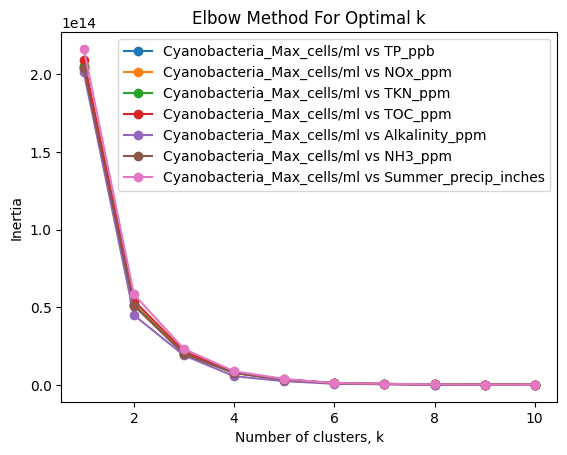

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.1

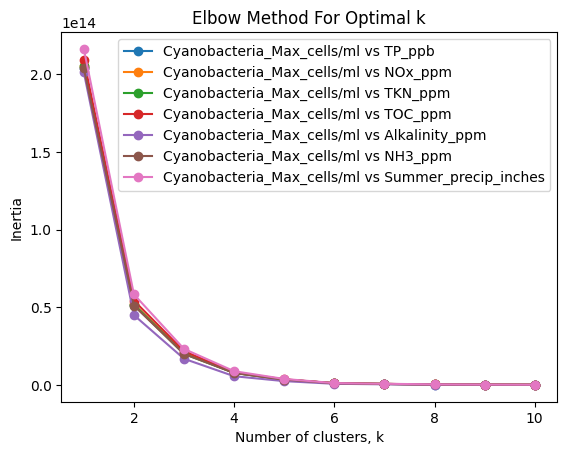

In [70]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data1 = pd.read_csv("data1.csv")
data2 = pd.read_csv("data2.csv")

def get_data(main_data: pd.DataFrame, col1, col2):
    data = main_data[[col1, col2]]
    # filter
    data = data[data[col1] != "na"]
    data = data[data[col2] != "na"]

    # convert two columns integer
    data[col1] = data[col1].astype(float)
    data[col2] = data[col2].astype(float)
    return data

# Define the columns of interest
columns_of_interest = [
    ("Cyanobacteria_Max_cells/ml", "TP_ppb"),
    ("Cyanobacteria_Max_cells/ml", "NOx_ppm"),
    ("Cyanobacteria_Max_cells/ml", "TKN_ppm"),
    ("Cyanobacteria_Max_cells/ml", "TOC_ppm"),
    ("Cyanobacteria_Max_cells/ml", "Alkalinity_ppm"),
    ("Cyanobacteria_Max_cells/ml", "NH3_ppm"),
    ("Cyanobacteria_Max_cells/ml", "Summer_precip_inches"),
]

# Loop over the columns of interest
for col1, col2 in columns_of_interest:
    # Get the data for the current columns
    _data1 = get_data(data1, col1, col2)

    # Combine the data
    combined_data = pd.concat([_data1])

    # List to hold the inertia for each k
    inertias = []

    # Range of k values to try
    k_values = range(1, 11)

    for k in k_values:
        # Create a KMeans instance with k clusters
        kmeans = KMeans(n_clusters=k)

        # Fit the model to the data
        kmeans.fit(combined_data)

        # Append the inertia to the list of inertias
        inertias.append(kmeans.inertia_)

    # Plot k values vs inertias
    plt.plot(k_values, inertias, "-o", label=f"{col1} vs {col2}")

# Add labels and title to the plot
plt.xlabel("Number of clusters, k")
plt.ylabel("Inertia")
plt.title("Elbow Method For Optimal k")
plt.legend()
plt.show()

# Loop over the columns of interest
for col1, col2 in columns_of_interest:
    # Get the data for the current columns
    _data1 = get_data(data1, col1, col2)

    # Combine the data
    combined_data = pd.concat([_data1])

    # List to hold the inertia for each k
    inertias = []

    # Range of k values to try
    k_values = range(1, 11)

    for k in k_values:
        # Create a KMeans instance with k clusters
        kmeans = KMeans(n_clusters=k)

        # Fit the model to the data
        kmeans.fit(combined_data)

        # Append the inertia to the list of inertias
        inertias.append(kmeans.inertia_)

    # Plot k values vs inertias
    plt.plot(k_values, inertias, "-o", label=f"{col1} vs {col2}")

# Add labels and title to the plot
plt.xlabel("Number of clusters, k")
plt.ylabel("Inertia")
plt.title("Elbow Method For Optimal k")
plt.legend()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


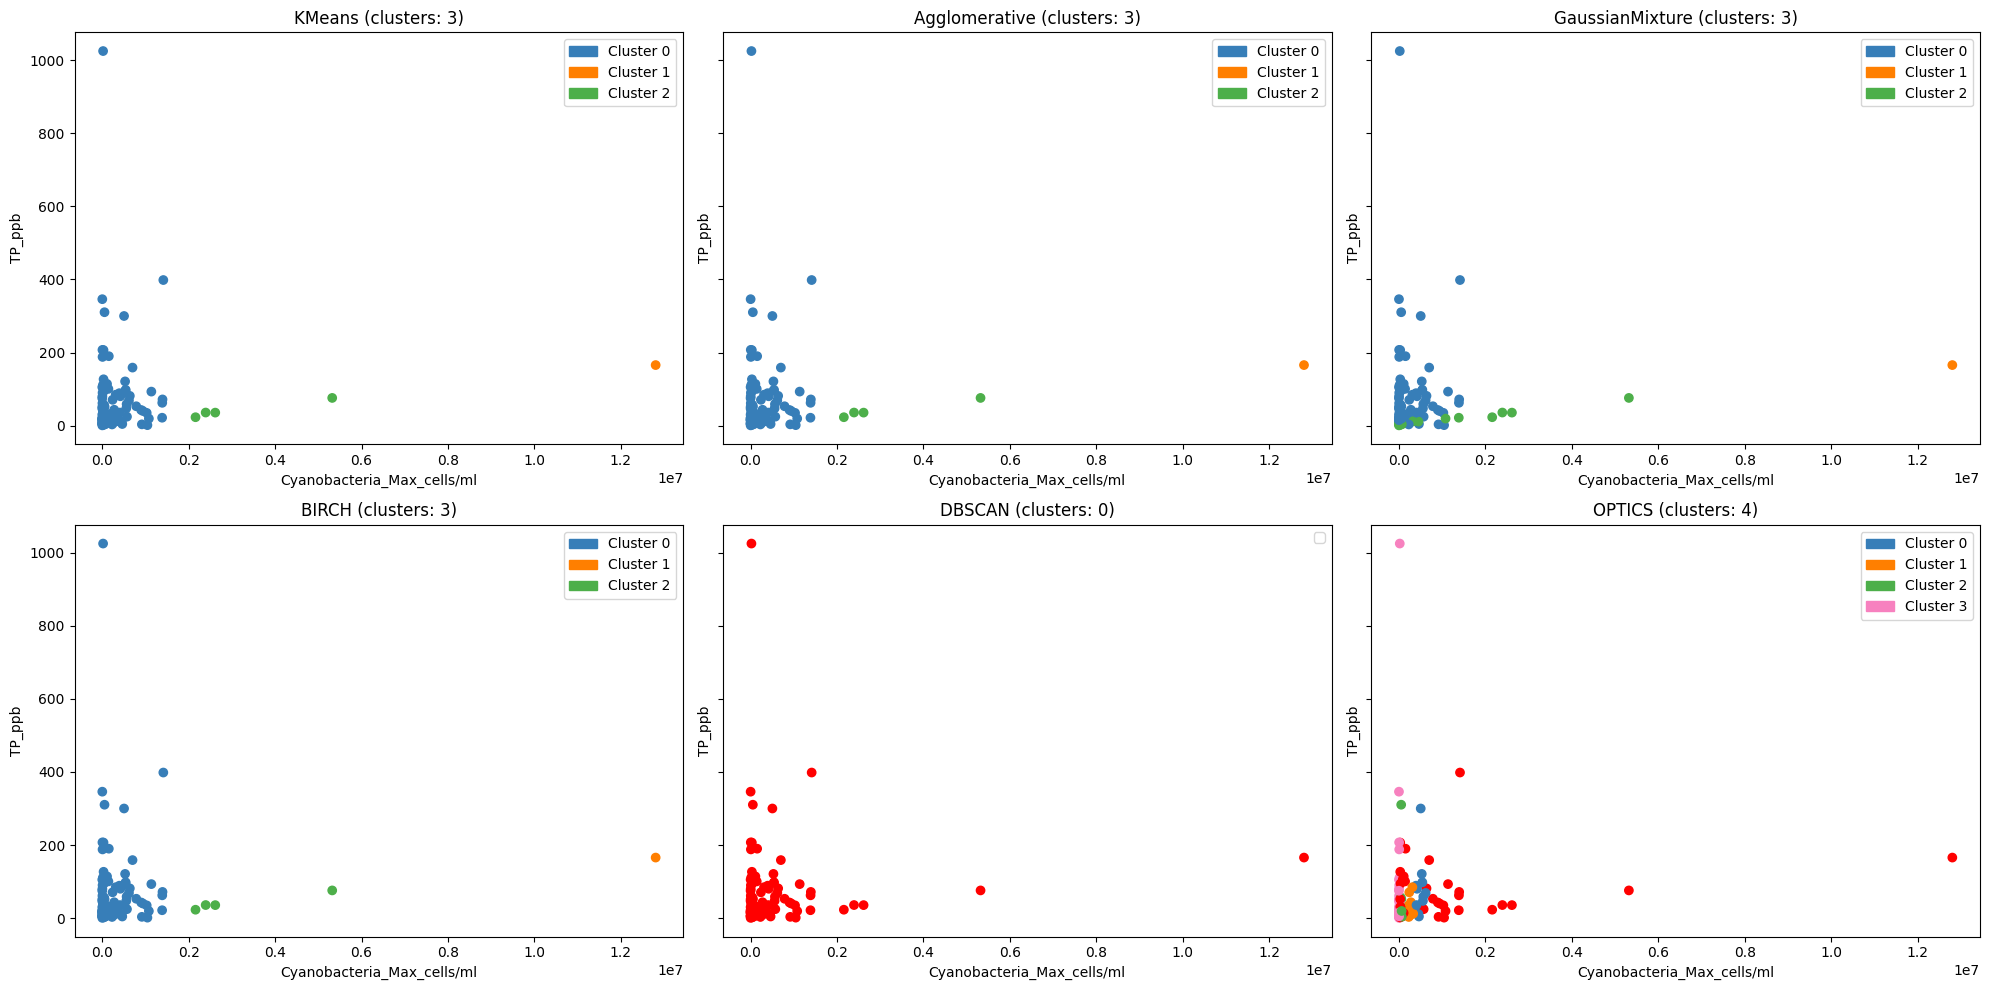

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


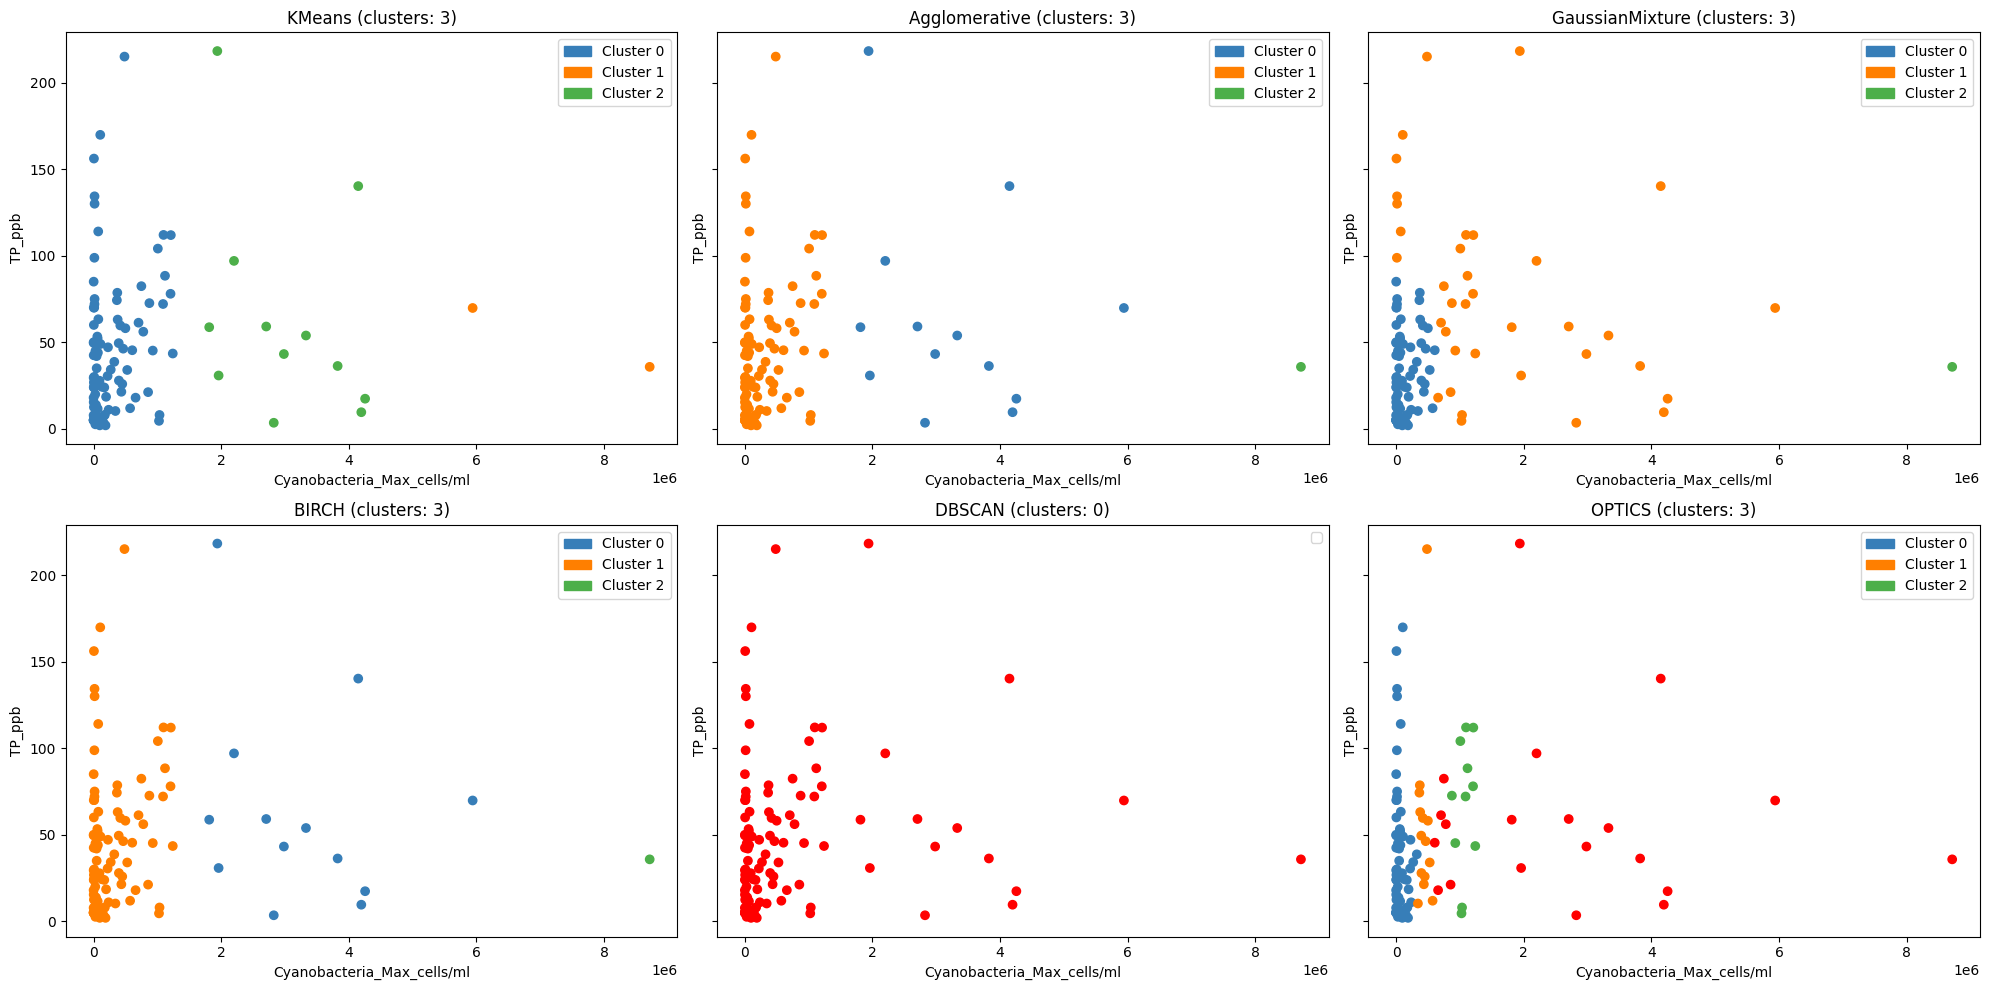

In [71]:
from sklearn.cluster import KMeans, DBSCAN, OPTICS, AgglomerativeClustering, Birch
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

def apply_clustering_algorithms(data,column1, column2):
    data = get_data(data,column1, column2)
    
    algorithms = [
        ("KMeans", KMeans(n_clusters=3)),
        ("Agglomerative", AgglomerativeClustering(n_clusters=3)),
        ("GaussianMixture", GaussianMixture(n_components=3)),
        ("BIRCH", Birch(threshold=0.5,branching_factor=50)),
        ("DBSCAN", DBSCAN(eps=0.025, min_samples=5)),
        ("OPTICS", OPTICS(min_samples=10, xi=0.025)),
    ]
    
    n_algorithms = len(algorithms)
    n_rows = 2
    n_cols = (n_algorithms + 1) // n_rows  # Round up to ensure enough subplots
    
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 10), sharey=True)
    axs = axs.flatten()  # Flatten to make indexing easier
    
    for ax, (name, algorithm) in zip(axs, algorithms):
        # GaussianMixture uses 'predict' instead of 'fit_predict'
        if name == "GaussianMixture":
            algorithm.fit(data)
            labels = algorithm.predict(data)
        else:
            labels = algorithm.fit_predict(data)
        
        # Create a color map where noise points are red
        colors = np.array(
            [
                "#377eb8", "#ff7f00", "#4daf4a", "#f781bf", "#a65628", "#984ea3", "#999999", "#6a3d9a", "#b15928",
                "#b2df8a", "#33a02c", "#fb9a99", "#fdbf6f", "#cab2d6", "#6a3d9a", "#1f78b4", "#b2df8a", "#33a02c",
                "#fb9a99", "#fdbf6f","#ff0000"
            ]
        )
        
        scatter = ax.scatter(data[column1], data[column2], color=colors[labels])
        
        # Set the labels of the axes
        ax.set_xlabel(column1)
        ax.set_ylabel(column2)
        
        # Count the number of unique labels (excluding noise points)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        ax.set_title(f"{name} (clusters: {n_clusters})")
        
        # Create a legend for the clusters
        legend_elements = [mpatches.Patch(color=colors[i], label=f'Cluster {i}') for i in range(n_clusters)]
        ax.legend(handles=legend_elements, loc='upper right')
    
    plt.tight_layout()
    plt.show()

apply_clustering_algorithms(data1,"Cyanobacteria_Max_cells/ml", "TP_ppb")
apply_clustering_algorithms(data2,"Cyanobacteria_Max_cells/ml", "TP_ppb")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


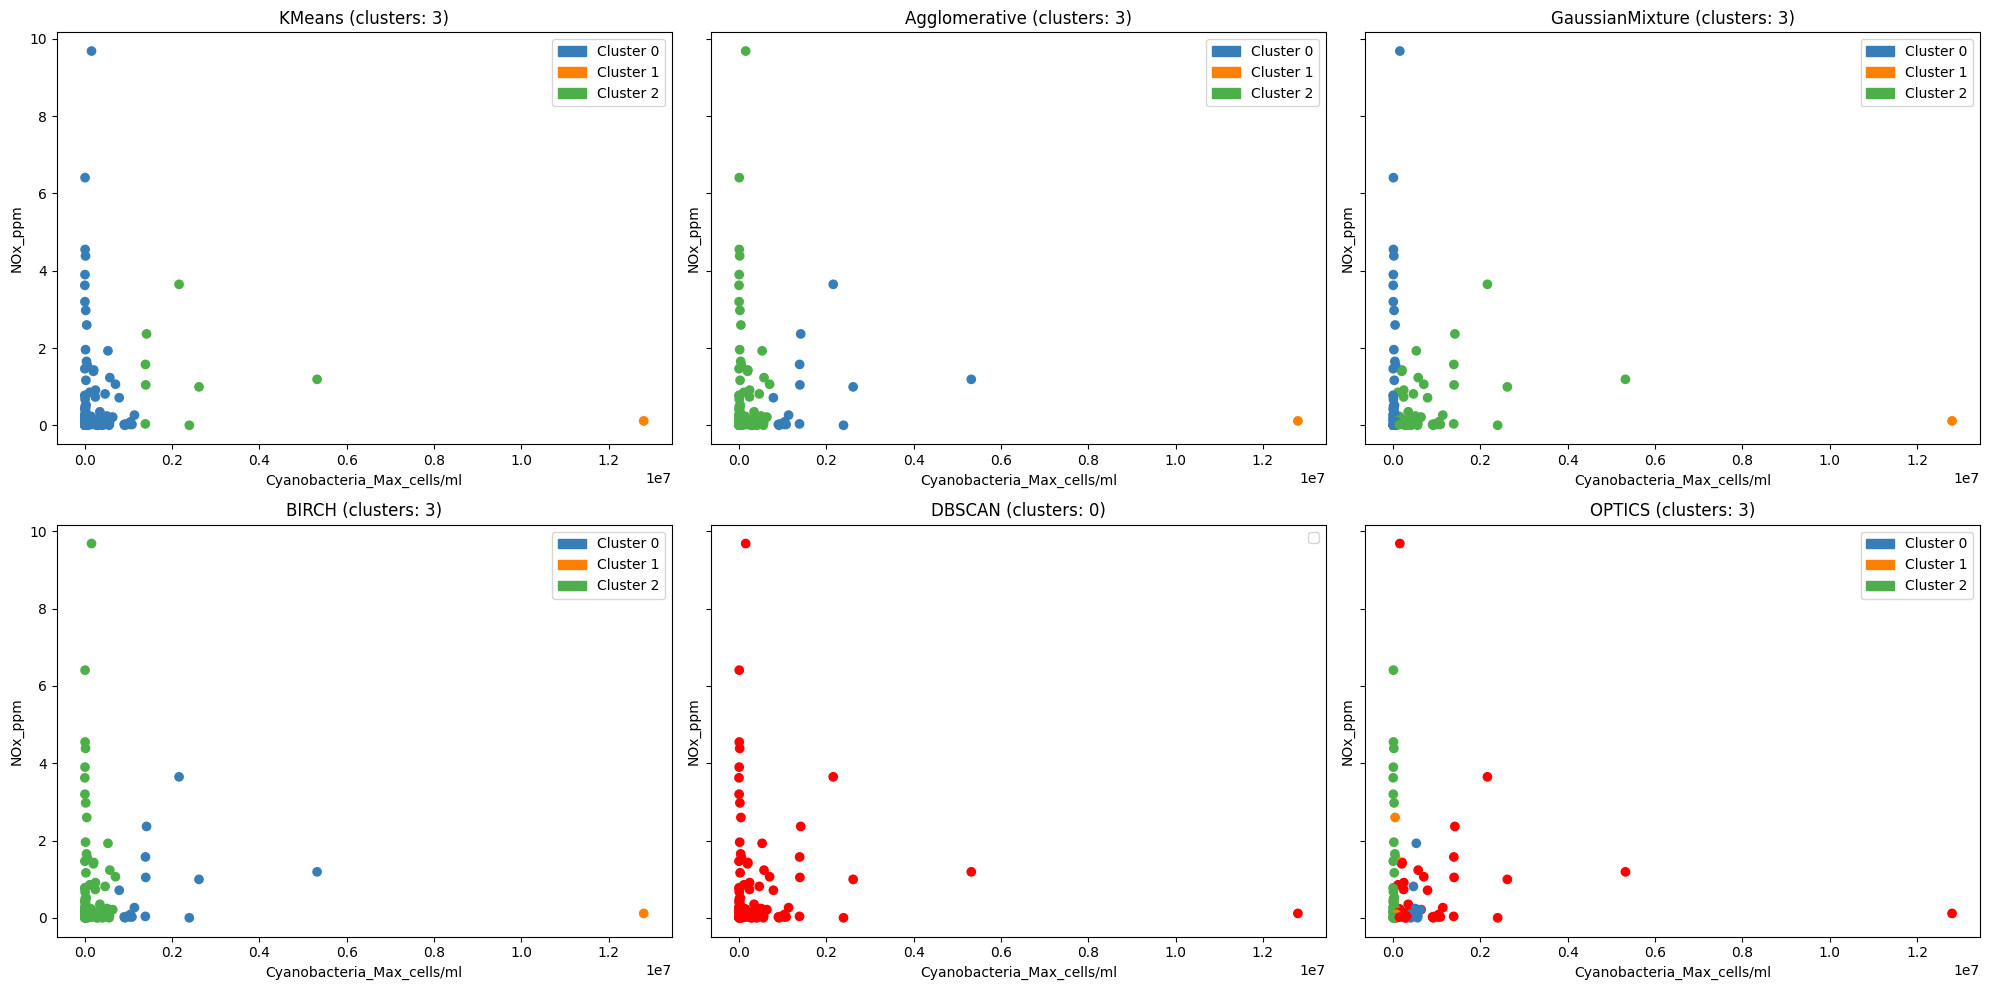

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


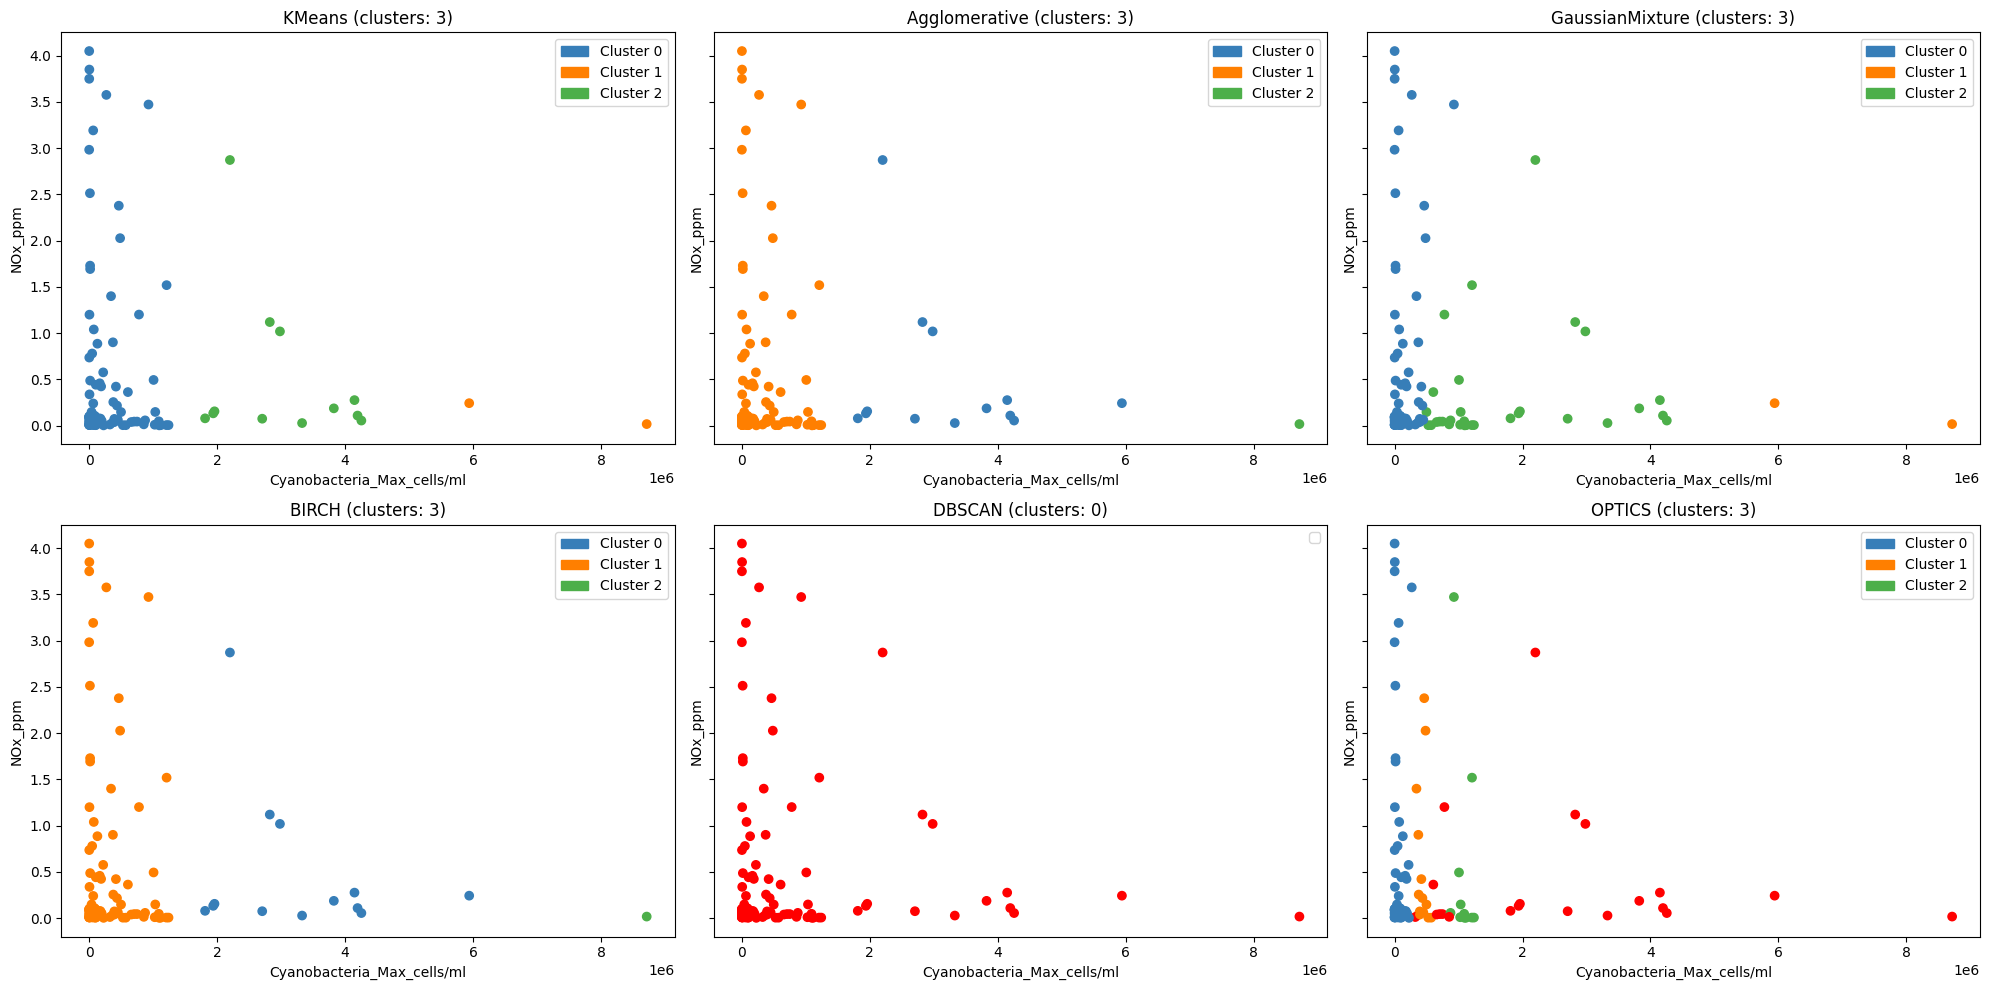

In [72]:
apply_clustering_algorithms(data1,"Cyanobacteria_Max_cells/ml", "NOx_ppm")
apply_clustering_algorithms(data2,"Cyanobacteria_Max_cells/ml", "NOx_ppm")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


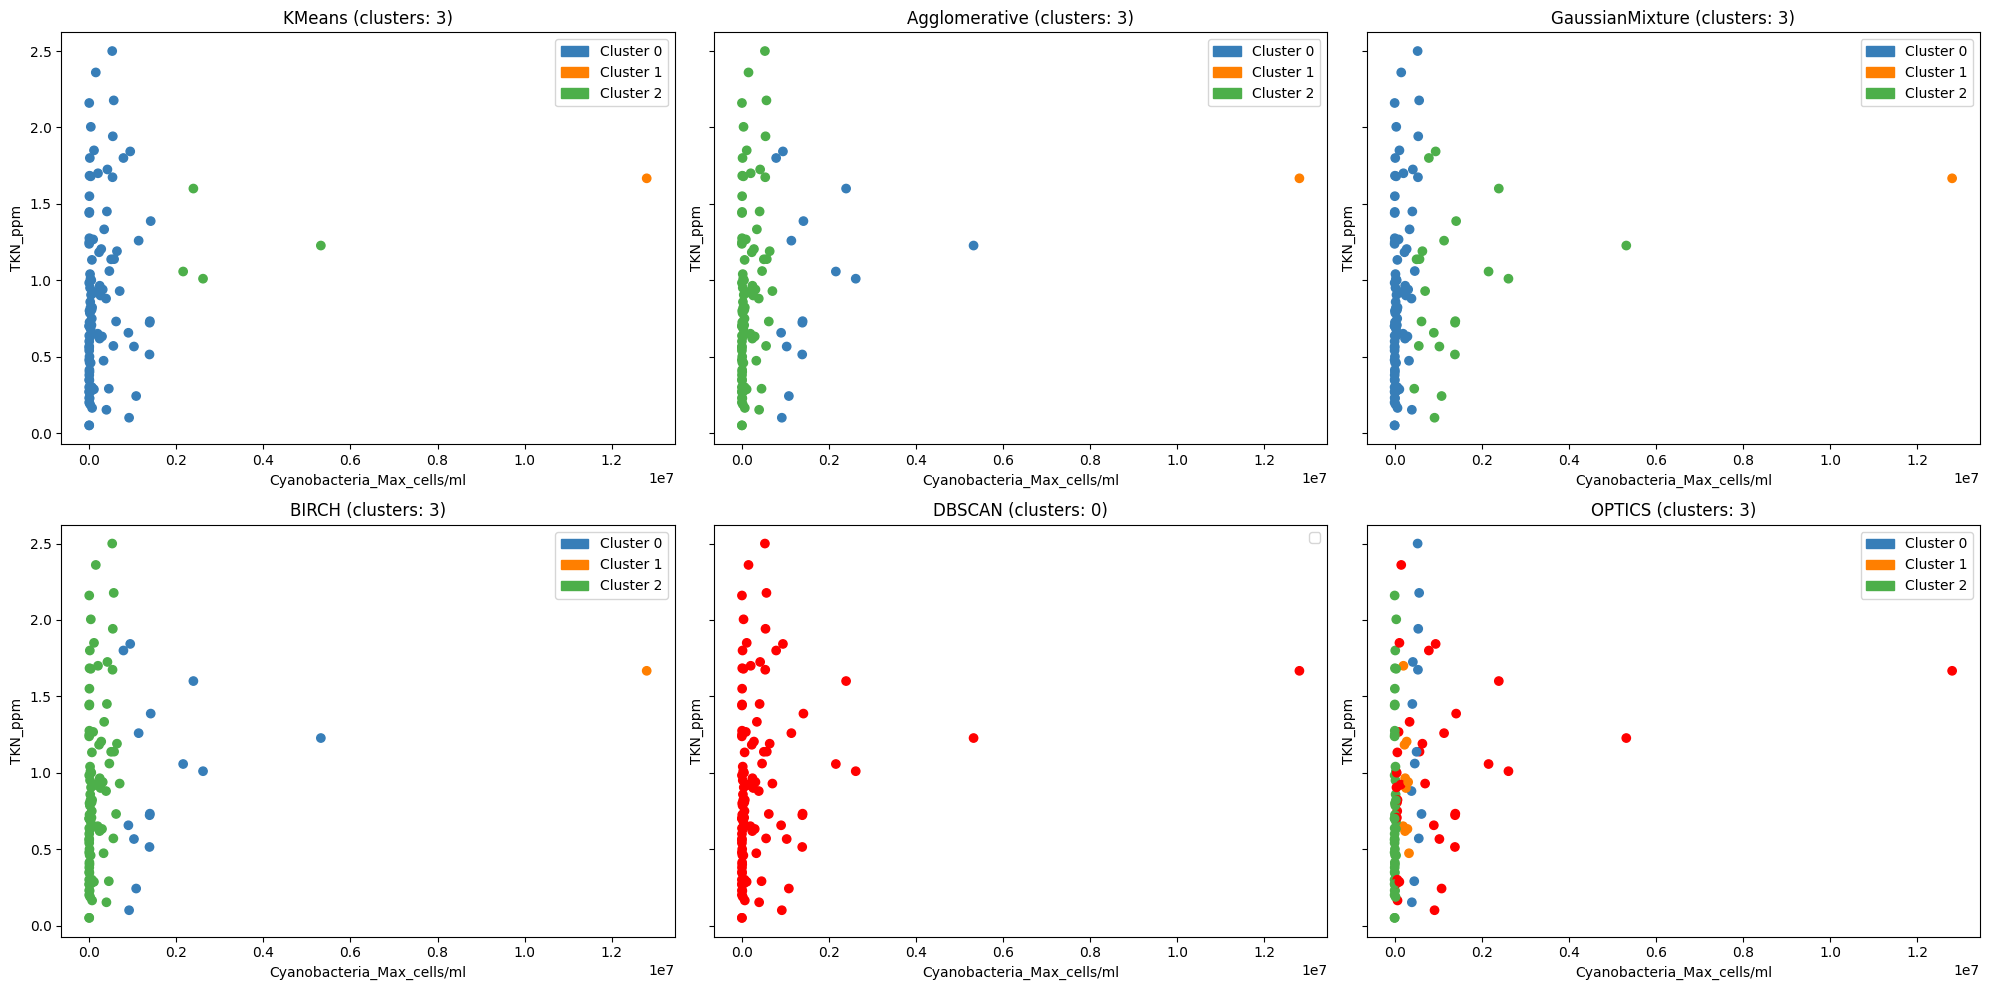

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


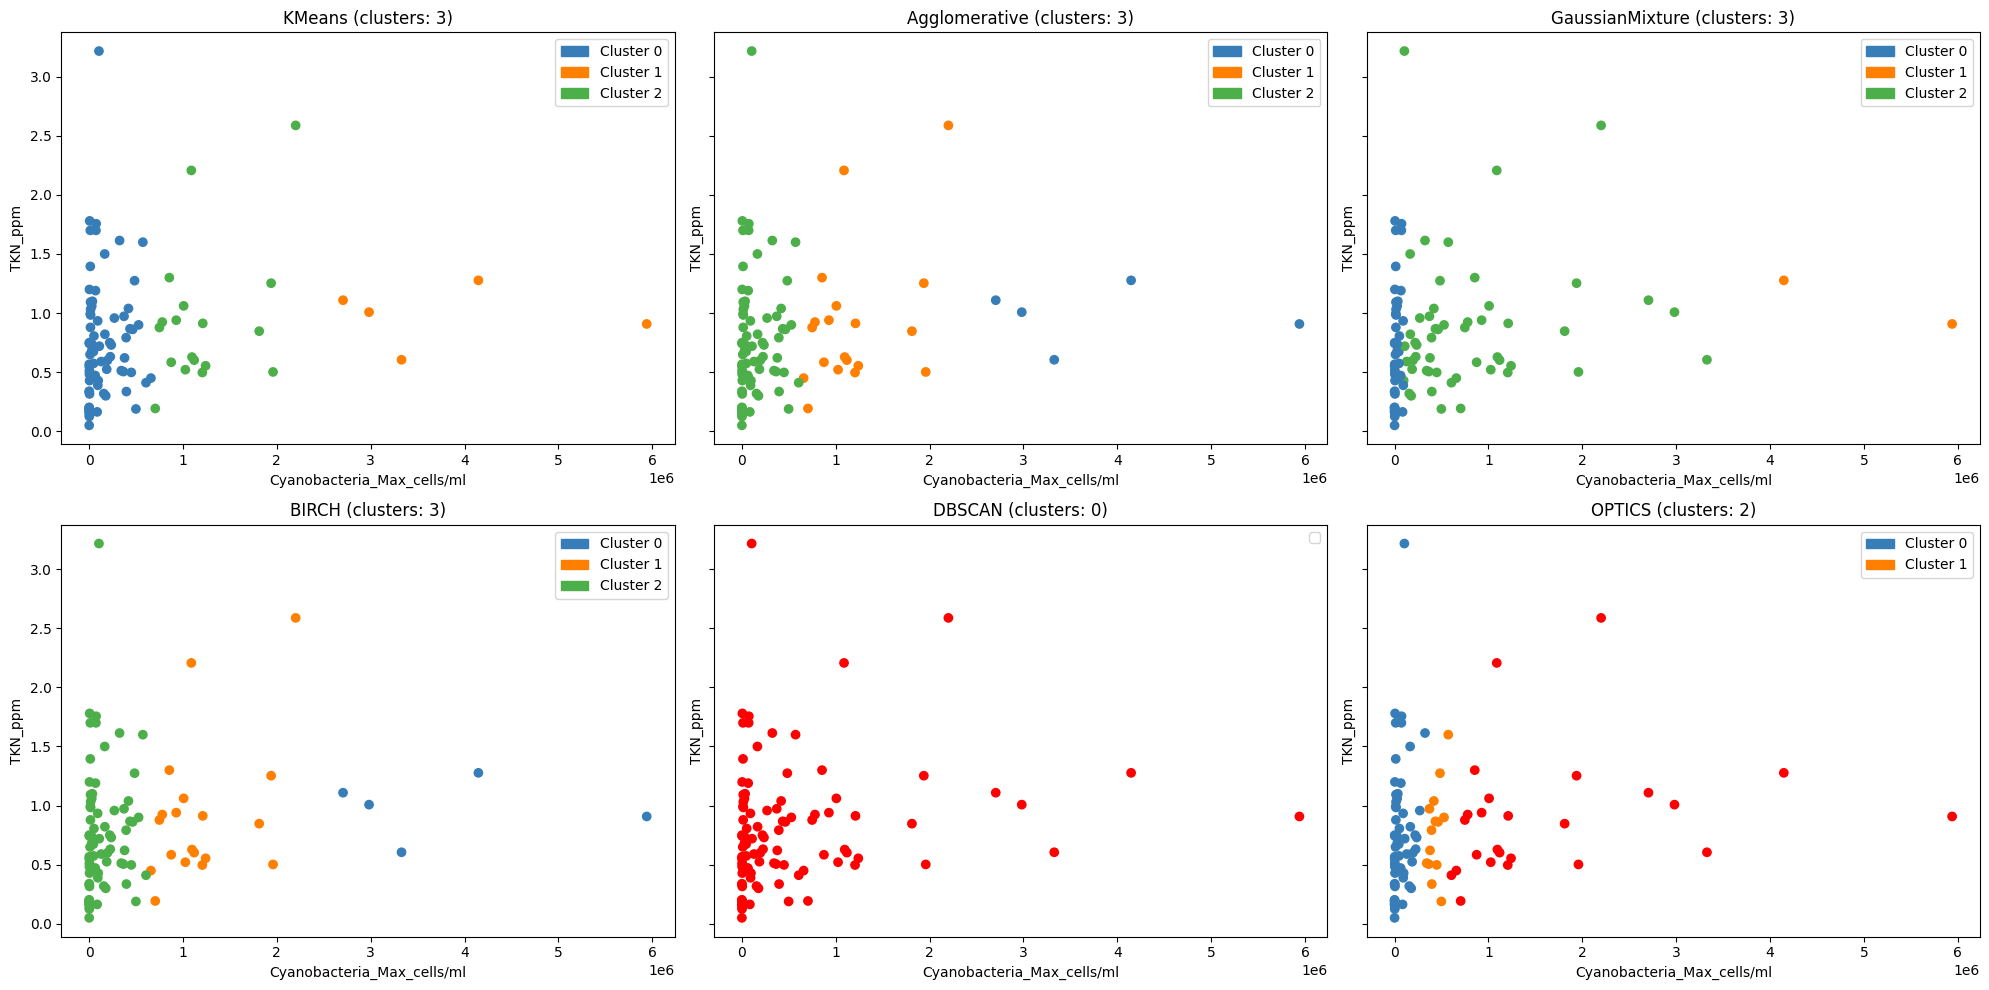

In [73]:

apply_clustering_algorithms(data1,"Cyanobacteria_Max_cells/ml", "TKN_ppm")
apply_clustering_algorithms(data2,"Cyanobacteria_Max_cells/ml", "TKN_ppm")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


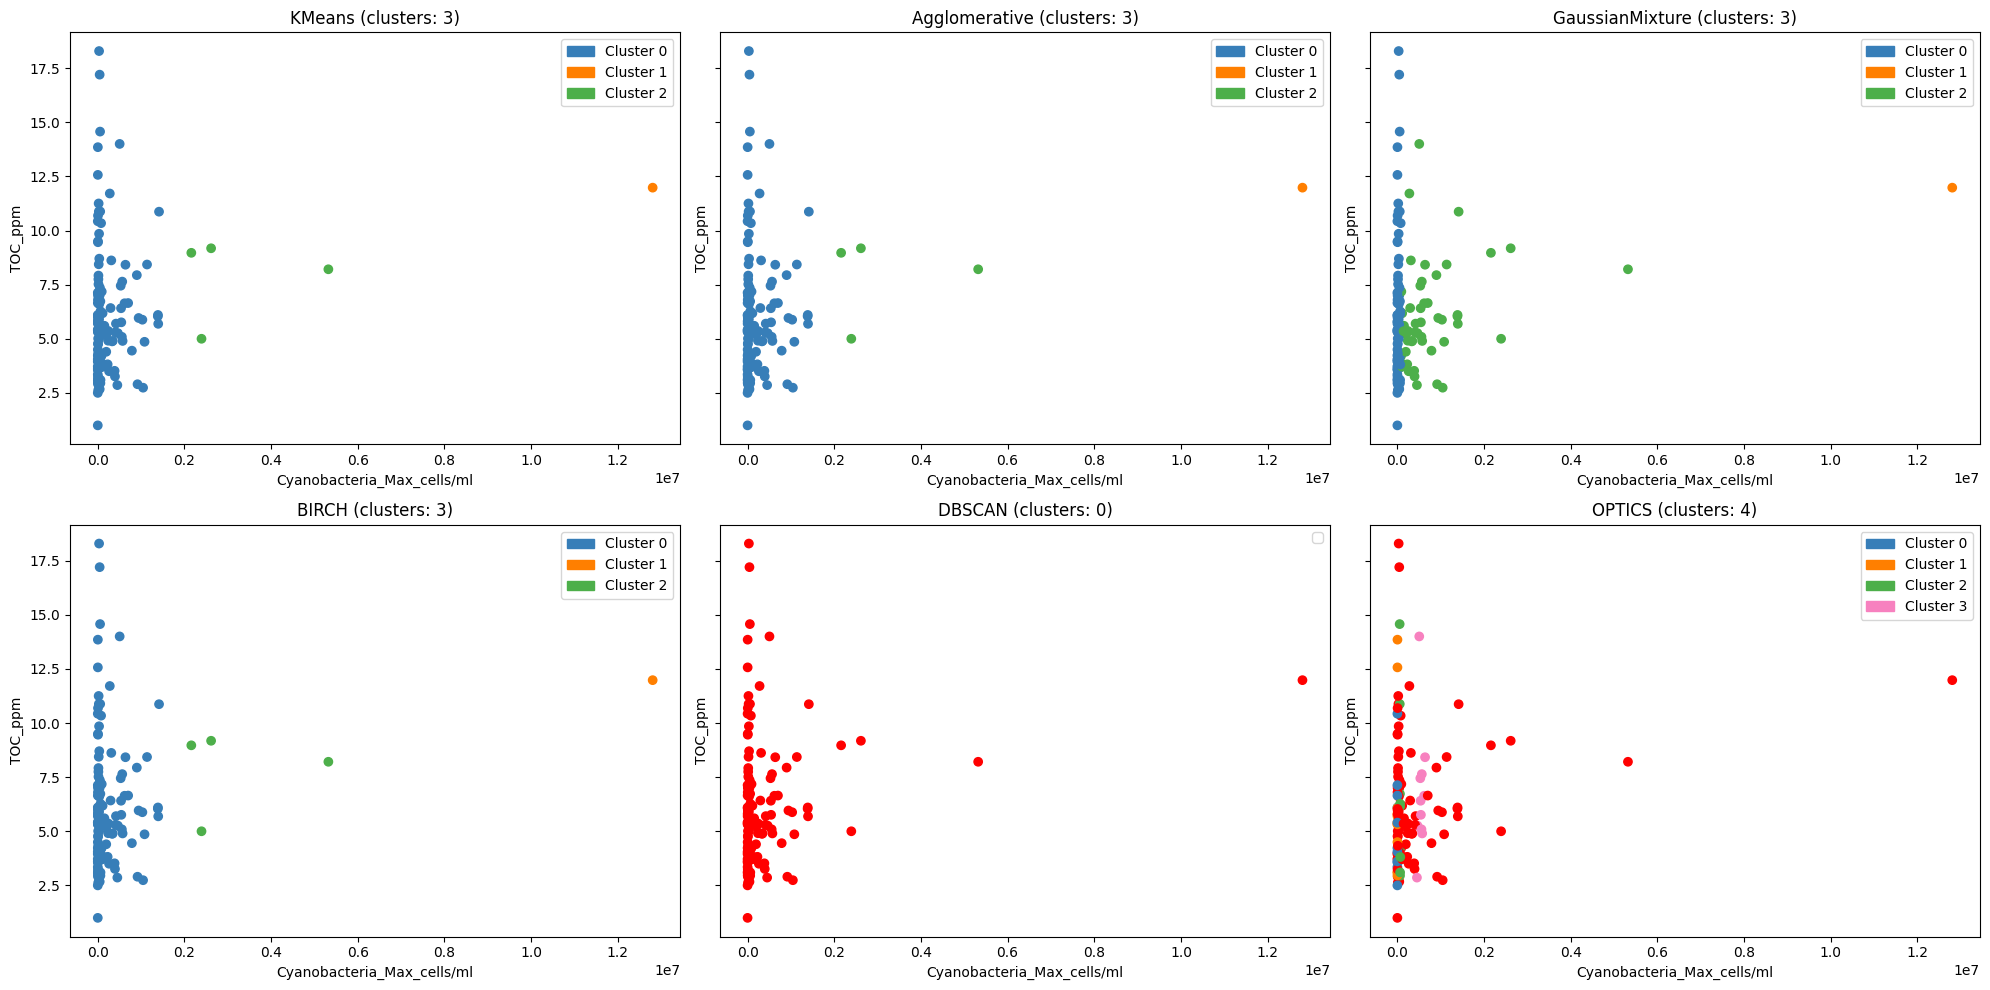

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


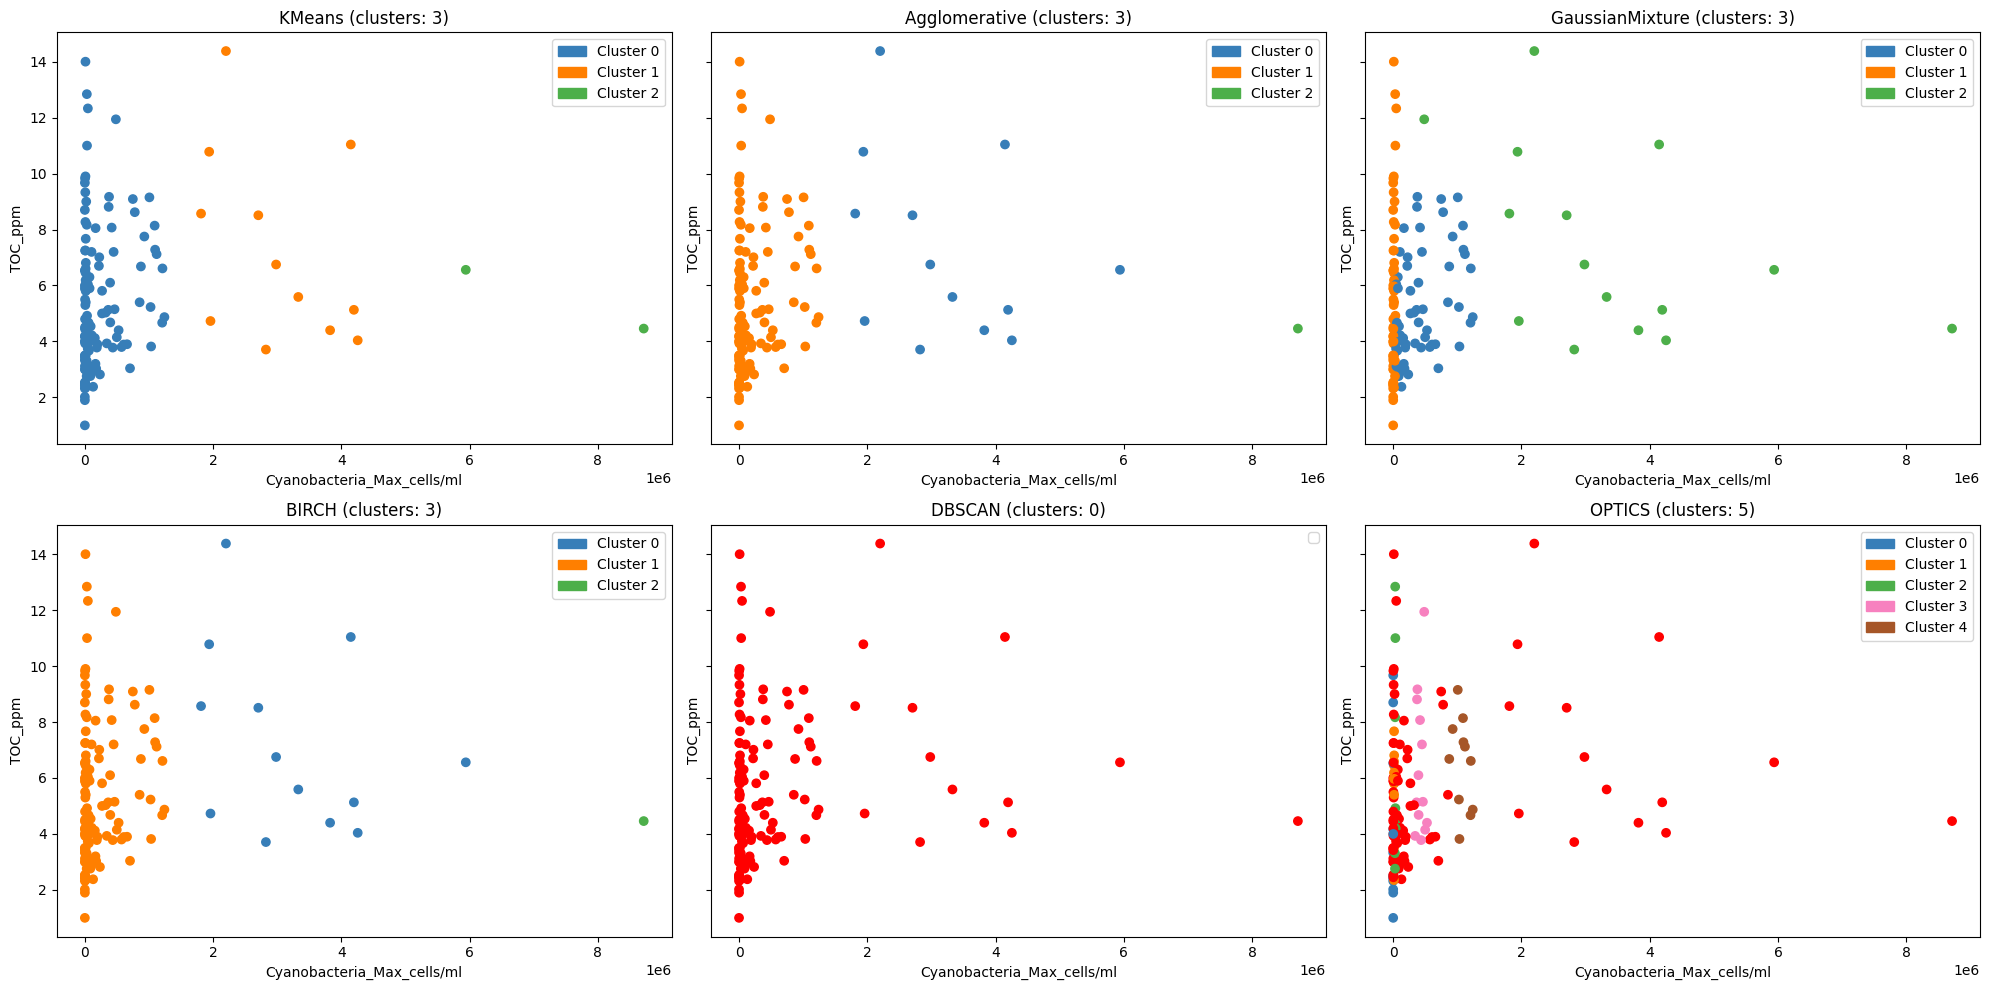

In [74]:

apply_clustering_algorithms(data1,"Cyanobacteria_Max_cells/ml", "TOC_ppm")
apply_clustering_algorithms(data2,"Cyanobacteria_Max_cells/ml", "TOC_ppm")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


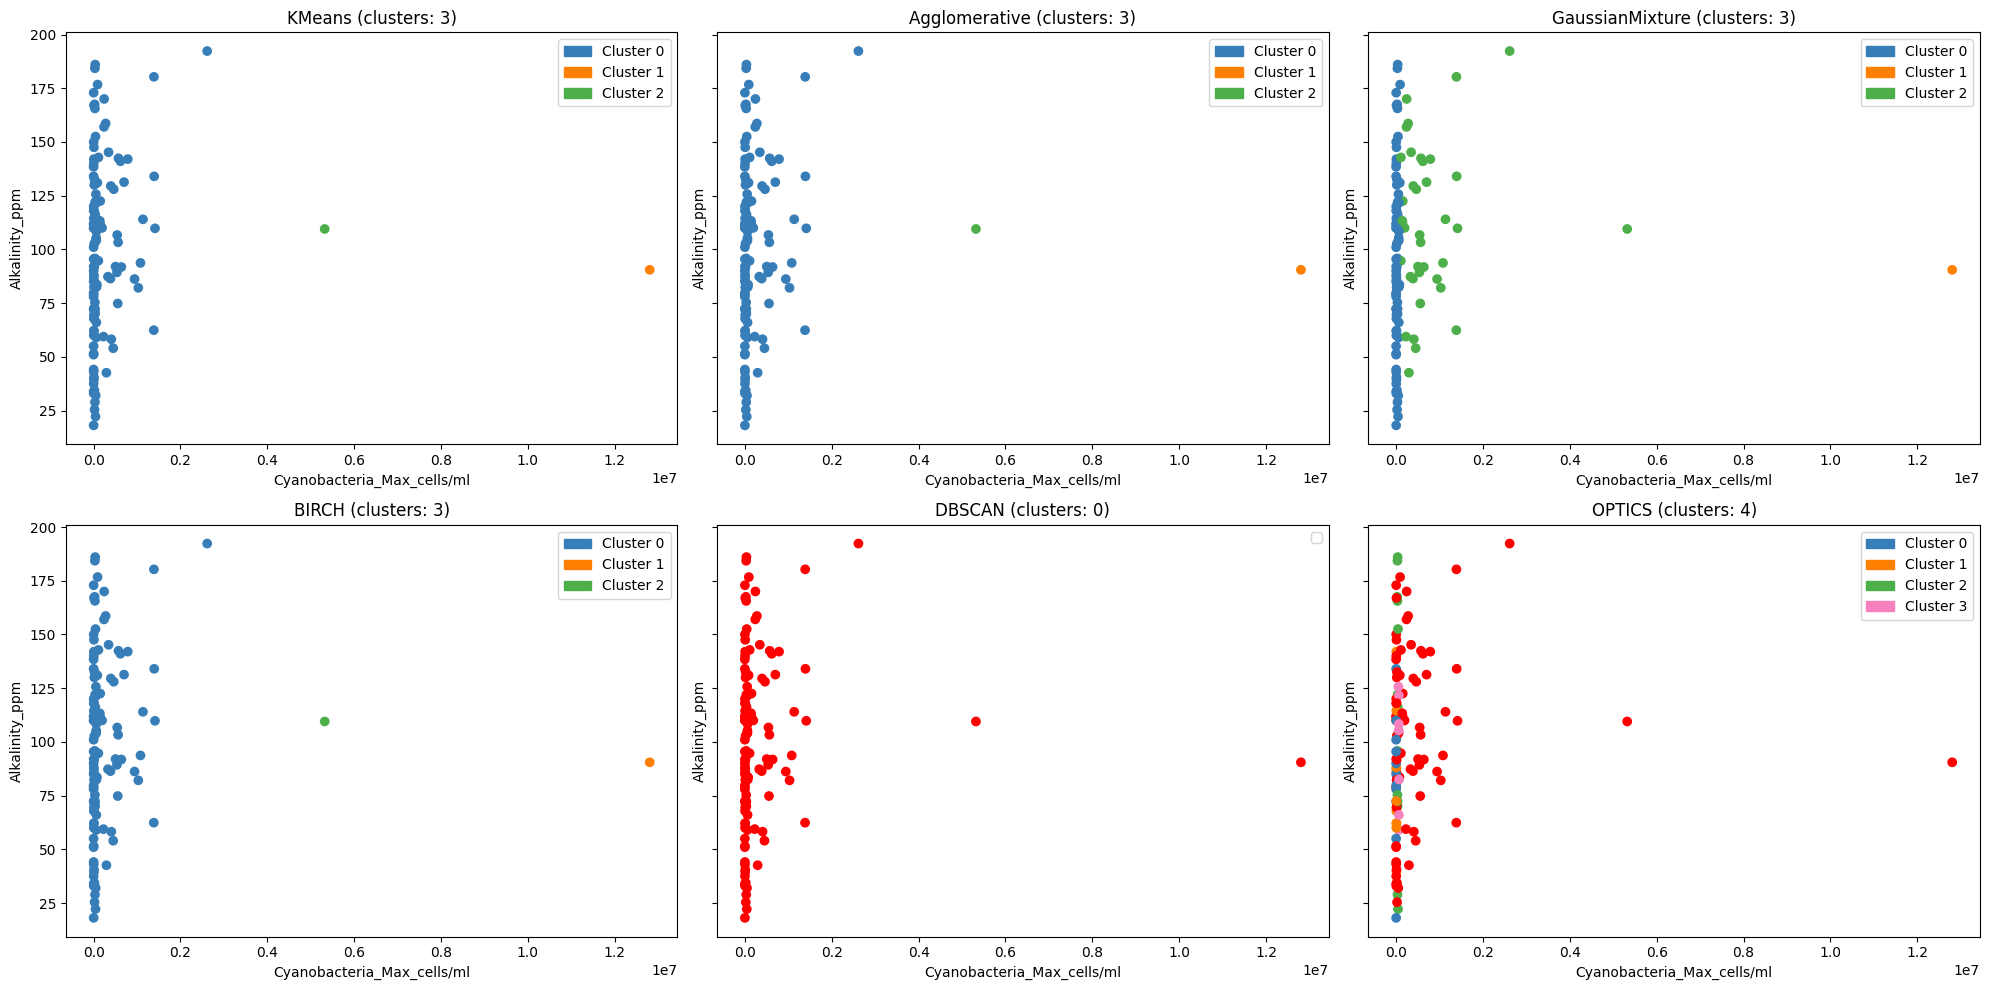

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


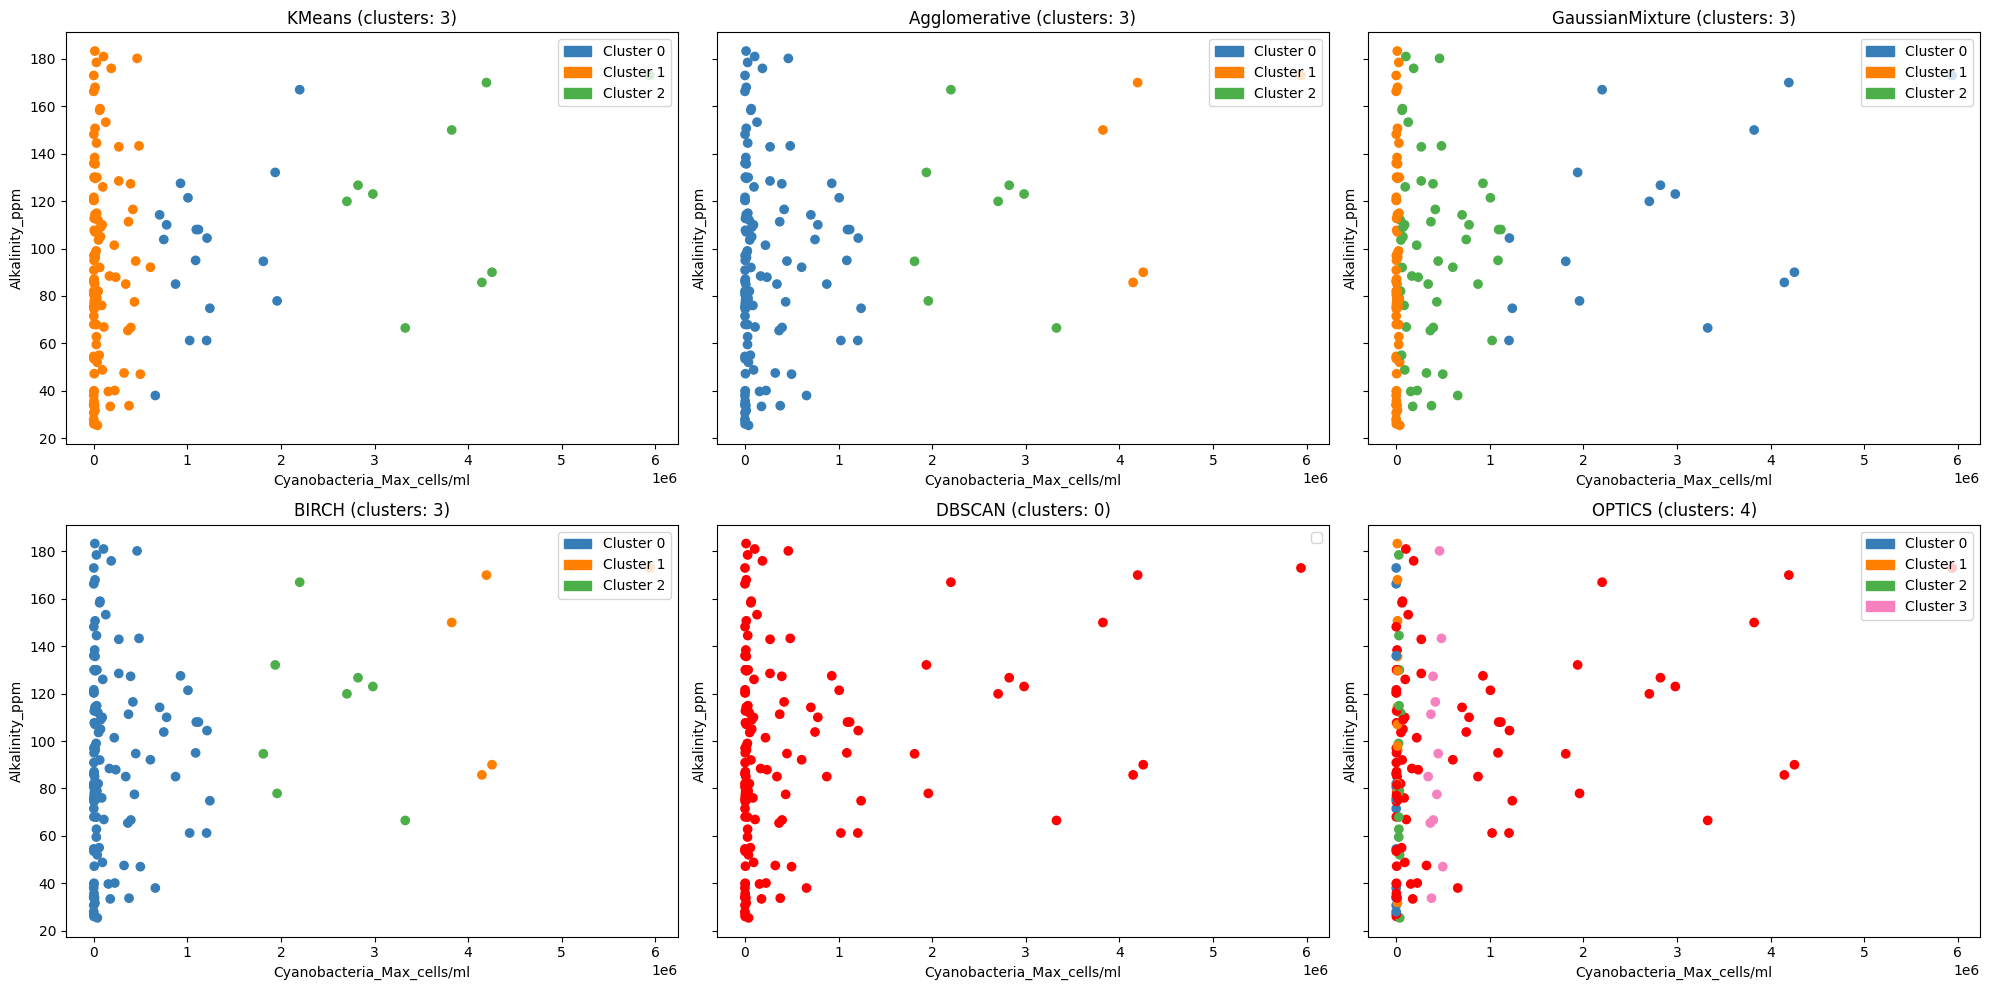

In [75]:

apply_clustering_algorithms(data1,"Cyanobacteria_Max_cells/ml", "Alkalinity_ppm")
apply_clustering_algorithms(data2,"Cyanobacteria_Max_cells/ml", "Alkalinity_ppm")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


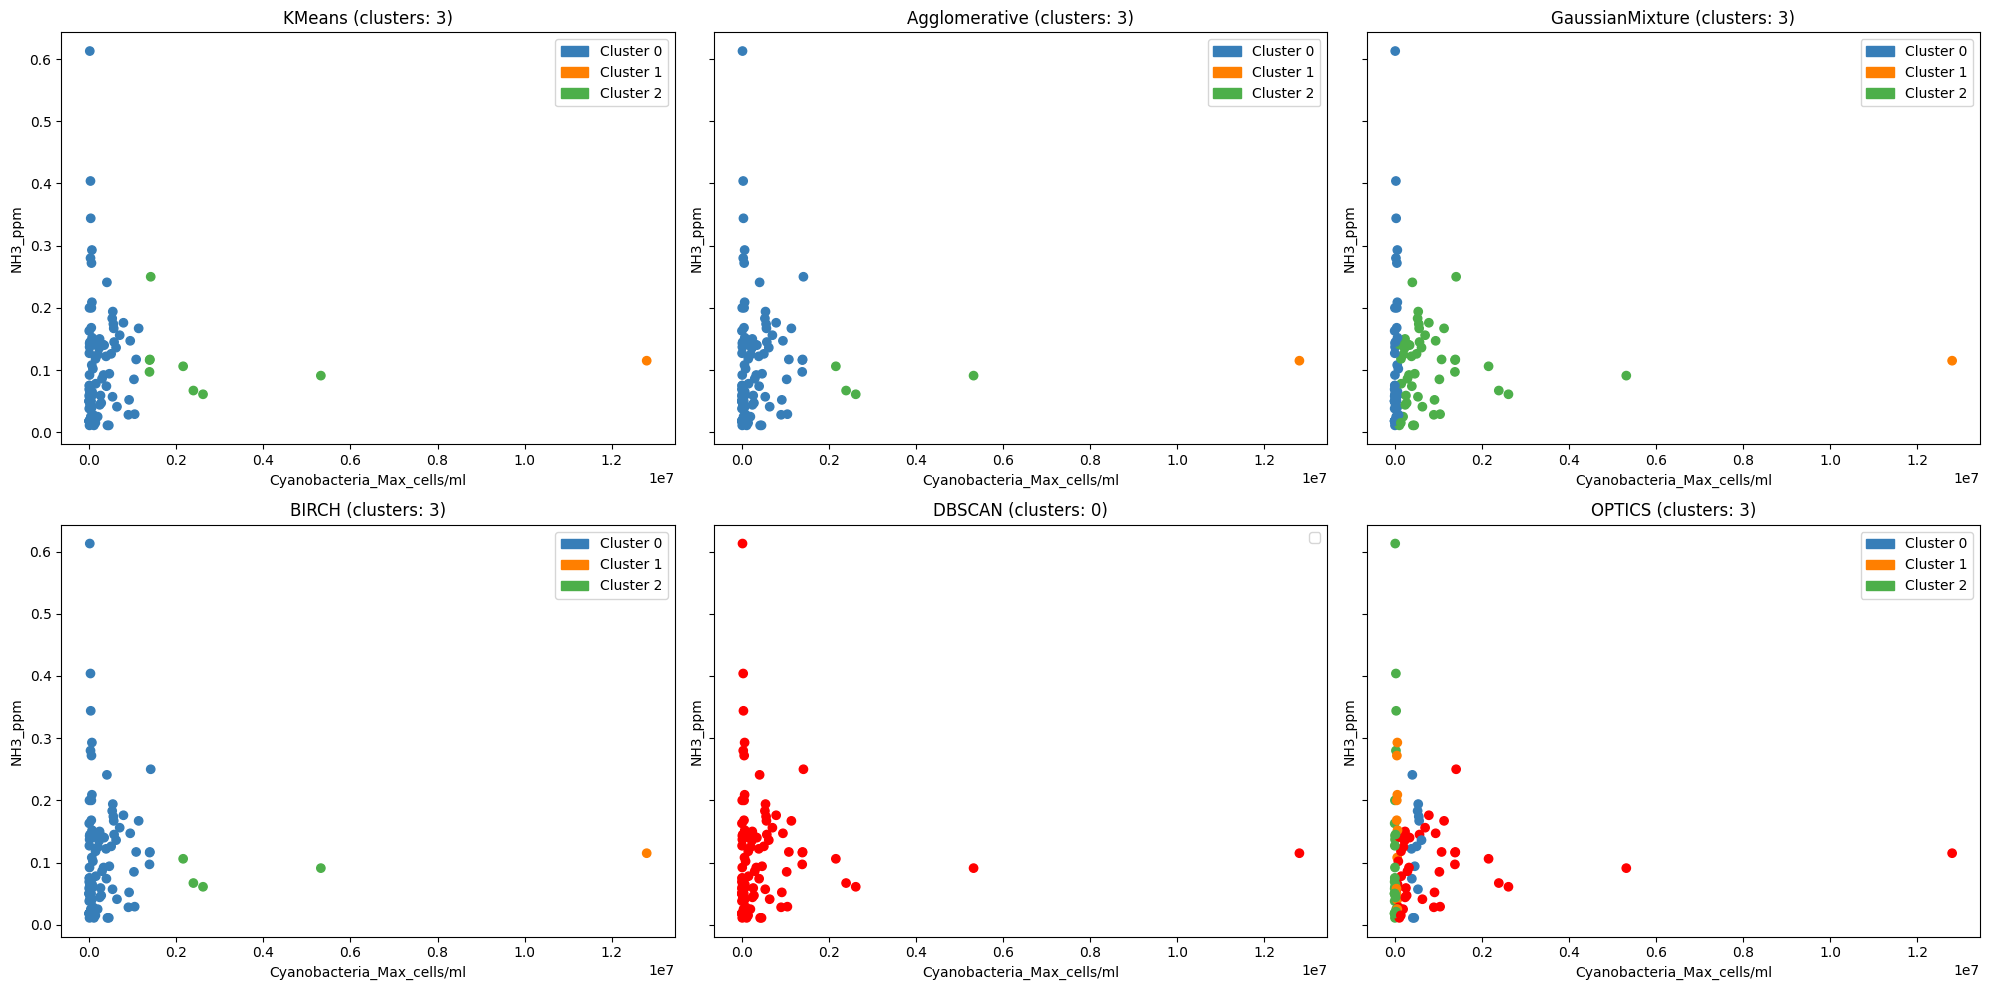

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


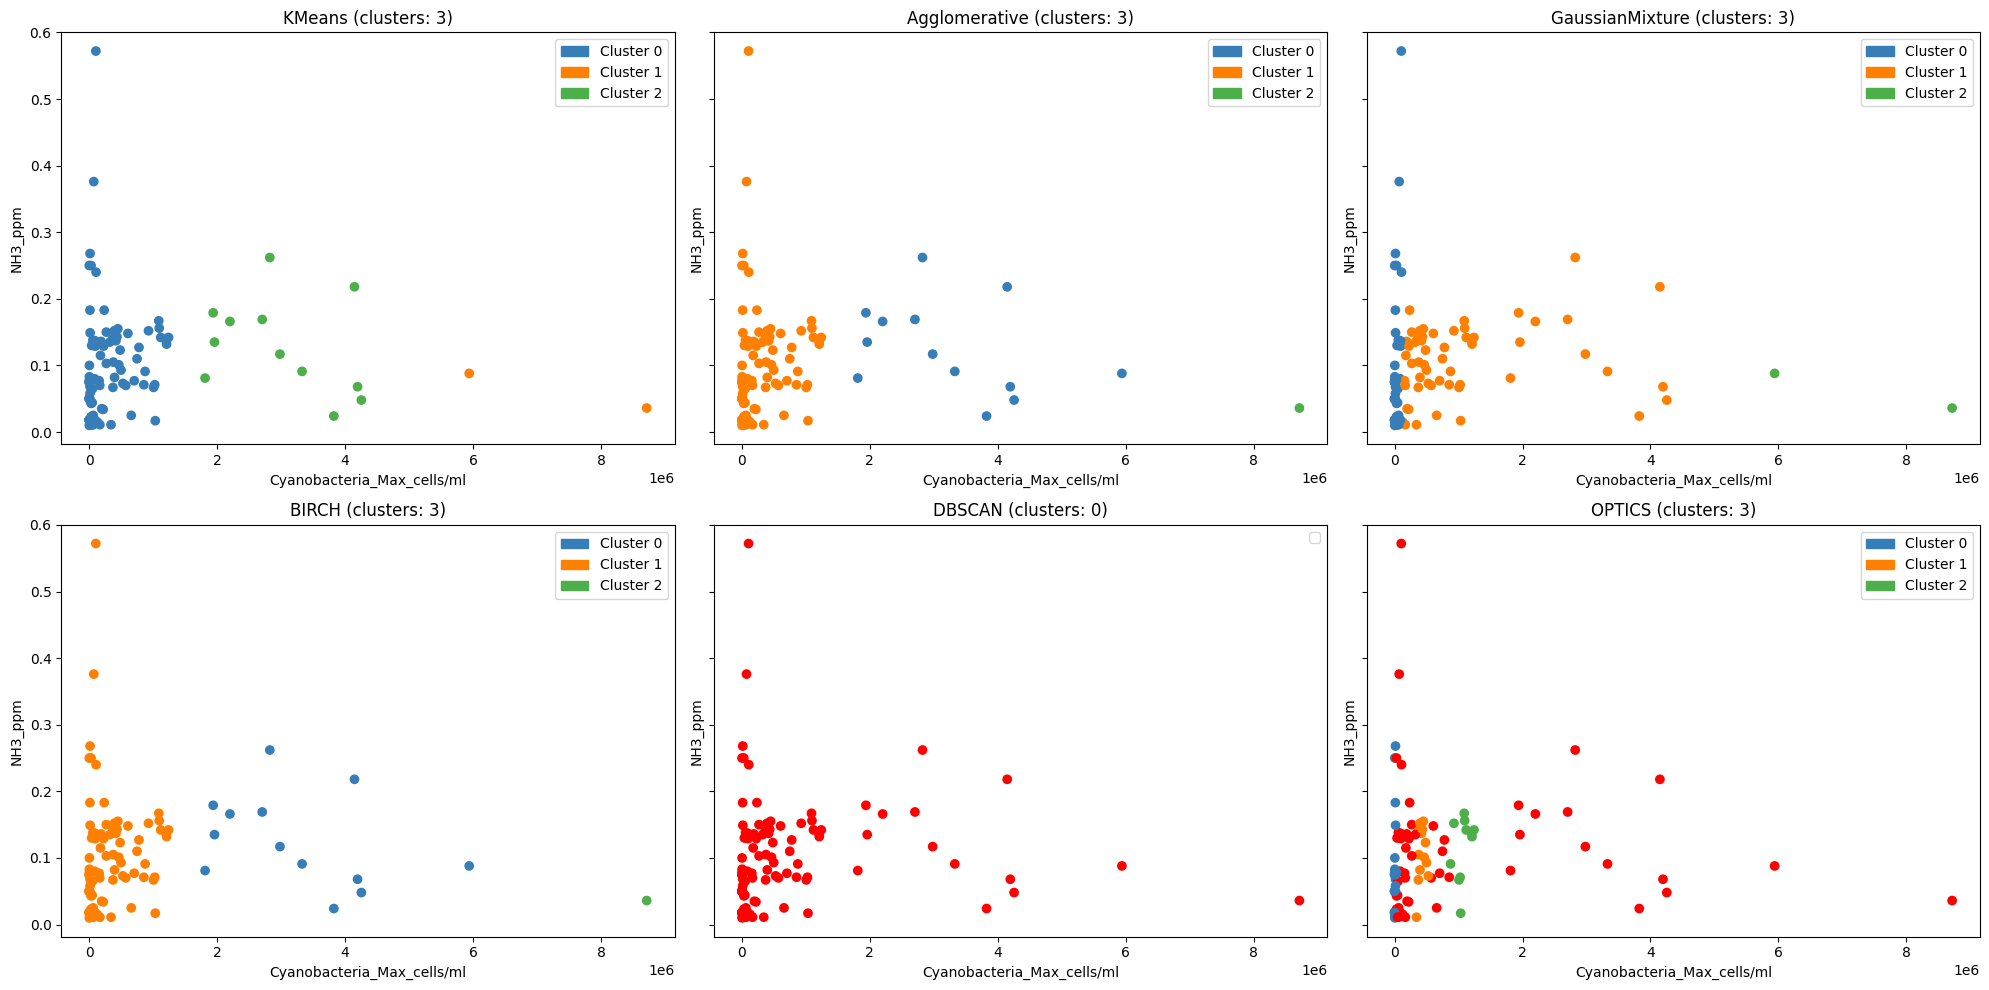

In [76]:

apply_clustering_algorithms(data1,"Cyanobacteria_Max_cells/ml", "NH3_ppm")
apply_clustering_algorithms(data2,"Cyanobacteria_Max_cells/ml", "NH3_ppm")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


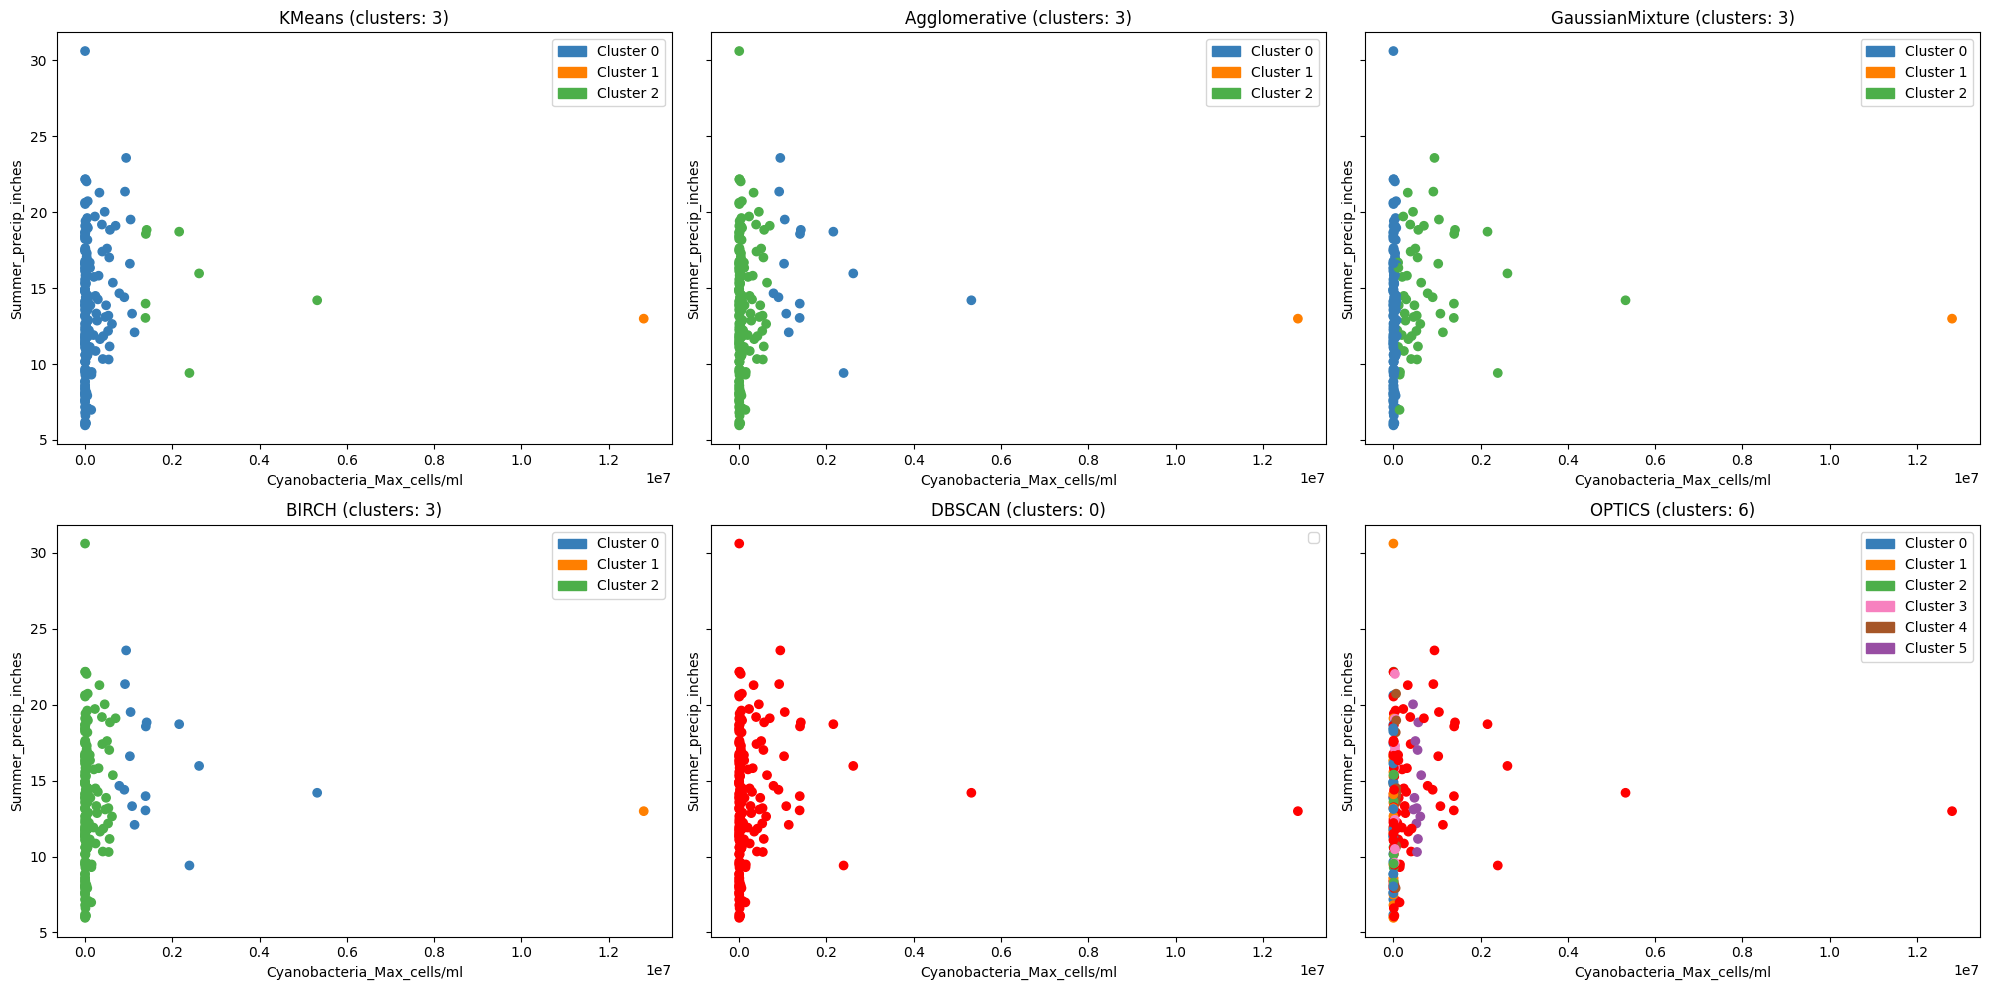

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


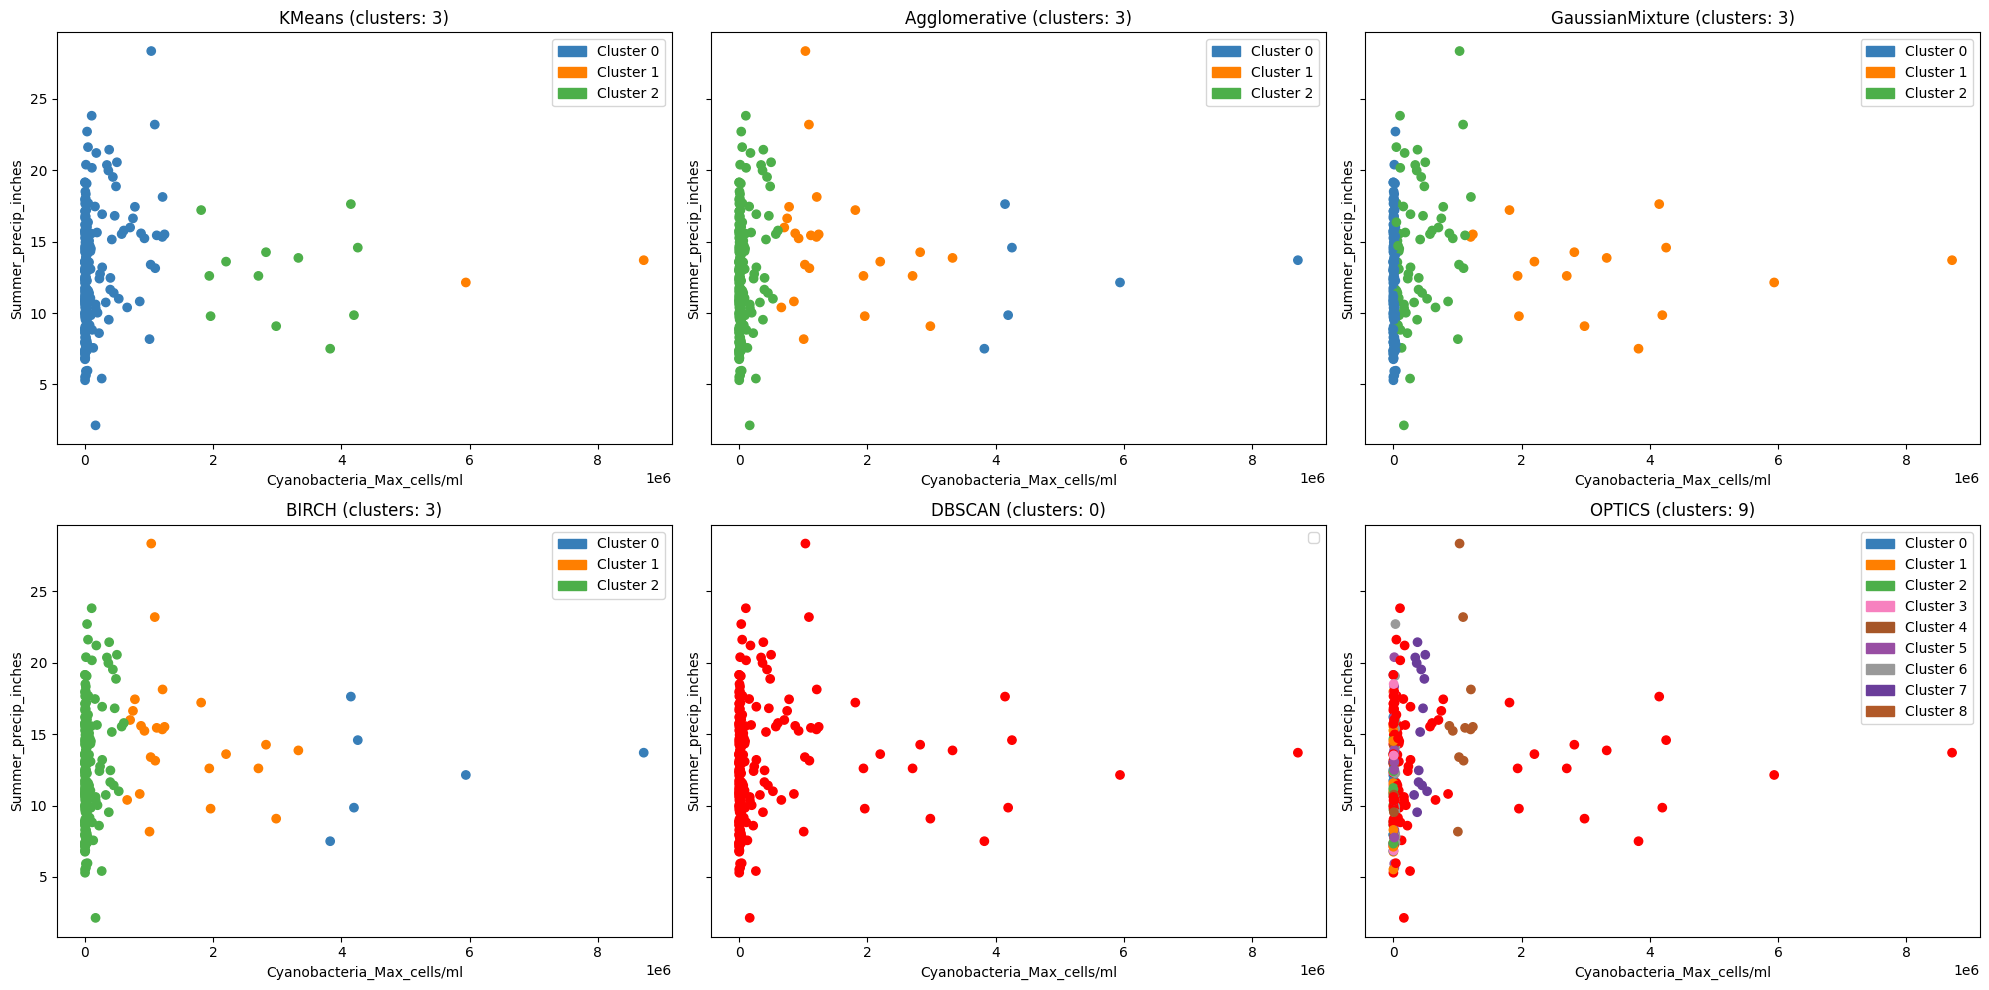

In [77]:

apply_clustering_algorithms(data1,"Cyanobacteria_Max_cells/ml", "Summer_precip_inches")
apply_clustering_algorithms(data2,"Cyanobacteria_Max_cells/ml", "Summer_precip_inches")